In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('..\Datasets\Emotion_final.csv')

### Data Cleaning

In [3]:
import texthero as hero

In [4]:
data['clean_text'] = hero.clean(data['Text'])

### Représentation (modèle de fréquence)

In [5]:
data['tfidf_clean_text'] = hero.tfidf(data['clean_text'])

### Visualizations

In [6]:
data['pca_tfidf_clean_text'] = hero.pca(data['tfidf_clean_text'])

In [7]:
hero.scatterplot(data, col='pca_tfidf_clean_text', color='Emotion', title = 'PCA Emotions')

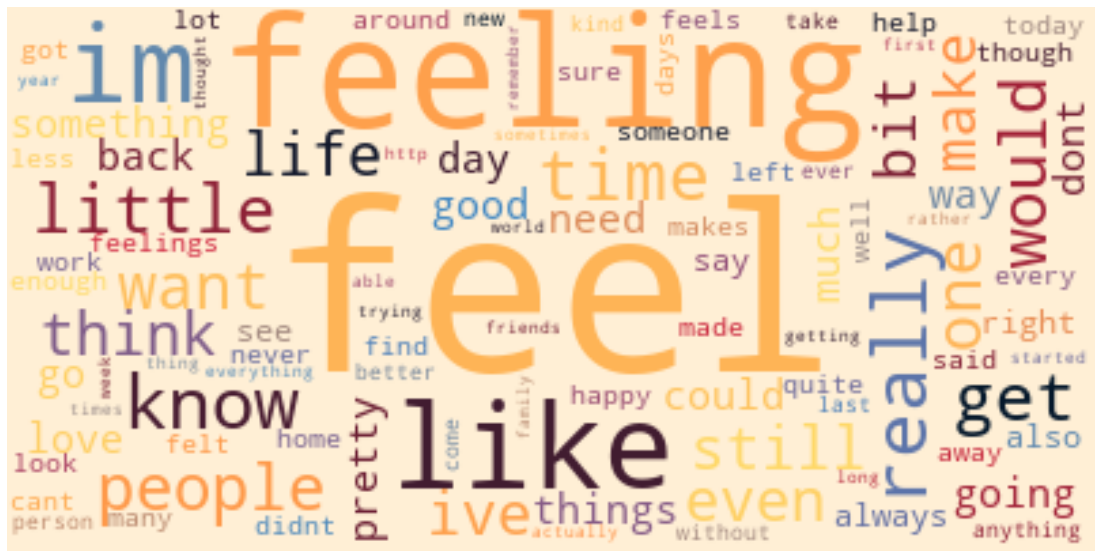

In [8]:
hero.wordcloud(data.clean_text, max_words=100)

In [9]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["subject","com","edu","\\","e","c","x"]))
data['clean_text'] = hero.remove_stopwords(data['clean_text'], custom_stopwords)

In [10]:
NUM_TOP_WORDS = 10
data.groupby('Emotion')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion              
anger     feel           1803
          feeling         923
          like            479
          im              426
          really          171
          get             154
          people          150
          know            149
          time            146
          little          136
fear      feel           1483
          feeling         926
          im              383
          like            323
          little          194
          bit             143
          know            139
          really          129
          anxious         126
          still           119
happy     feel           4948
          feeling        1956
          like           1267
          im             1007
          really          381
          time            370
          know            323
          get             311
          make            276
          people          266
love      feel           1180
          feeling         471
          like    

In [11]:
import fasttext


In [12]:
from sklearn.model_selection import train_test_split

In [16]:
data['Emotion'] = data[['Emotion']].apply(lambda x: '__label__' + x)

In [17]:
train, test = train_test_split(data, test_size=0.3)


In [18]:
train

,Text,Emotion,clean_text,tfidf_clean_text,pca_tfidf_clean_text
3750,i feel like i am one of the most confident peo...,__label__happy,feel like one confident people around maybe co...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.07213419506365525, 0.06575039813245902]"
2342,i feel blessed that i am free to be me,__label__love,feel blessed free,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.09742946142958618, 1.2646969256888702e-05]"
2032,i feel their energy i feel a joyful sweet enth...,__label__happy,feel energy feel joyful sweet enthusiasm life,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.10389798461385782, 0.022219926176909963]"
18967,i mean it was the same feeling i got around an...,__label__love,mean feeling got around anthony dog weewee kno...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.01968353358132903, -0.054087364559300966]"
3824,i feel like mike is loyal and will always be l...,__label__love,feel like mike loyal always loyal,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.08021308753796776, 0.09207111586112204]"
...,...,...,...,...,...
9115,i feel at this point i ought to just add my si...,__label__happy,feel point ought add sincere apologies taking ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.039423061418899896, -0.028949273791610188]"
10853,i do not have anyone that i feel comfortable e...,__label__happy,anyone feel comfortable enough walk tell whole...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03929208709405817, -0.026585790443448557]"
7635,i love the way it feels i love its permanence ...,__label__love,love way feels love permanence love nostalgic ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.036385672941011075, -0.05859890264106478]"
4742,i want them to feel eager to attend a amp m i ...,__label__happy,want feel eager attend amp want feel like belong,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.12597947876709156, 0.12468459579270244]"


In [19]:
import csv

train[['Emotion', 'clean_text']].to_csv('train.txt', index=False, sep = ' ', header = None, quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
test[['Emotion', 'clean_text']].to_csv('test.txt', index=False, sep = ' ', header = None, quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")

In [20]:
model = fasttext.train_supervised('train.txt', wordNgrams = 2)

In [21]:
model.test('test.txt')

(6438, 0.805995650823237, 0.805995650823237)